# Dimensionality Reduction using PCA and Visualization

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [78]:
data_file = "beer.csv"

In [79]:
beer_df = pd.read_csv(data_file)

In [80]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


In [81]:
beer_df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [82]:
features = ['calories', 'sodium', 'alcohol', 'cost']

## Apply PCA

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(beer_df[features])

In [85]:
x_scaled

array([[ 0.42839039,  0.00799719,  0.37792744, -0.4506559 ],
       [ 0.66382808,  0.61578328,  0.64387639, -0.4506559 ],
       [ 1.30287324, -1.20757501,  1.0427998 ,  1.62090751],
       [ 0.69746203, -0.59978891,  0.77685086,  1.89711597],
       [ 0.46202434,  1.22356938,  0.24495297, -1.48643761],
       [ 1.47104302,  1.3755159 ,  1.44172322, -0.65781224],
       [ 0.59656016,  1.83135548,  0.37792744, -0.51970801],
       [-1.08513763, -0.75173544, -0.15397044, -0.4506559 ],
       [-0.61426225, -1.05562848, -0.95181727, -0.65781224],
       [ 0.29385456,  0.46383676,  0.24495297, -0.38160379],
       [-0.98423576,  0.00799719, -0.41991938, -0.24349956],
       [ 0.12568478, -0.59978891, -0.28694491,  0.0327089 ],
       [ 0.63019412,  0.61578328,  0.37792744,  1.82806386],
       [ 0.59656016, -1.35952153,  0.77685086,  2.0352202 ],
       [-2.12779026,  0.00799719, -2.81345987, -0.79591647],
       [ 0.26022061,  0.61578328, -0.02099597, -0.4506559 ],
       [ 0.42839039,  1.

In [119]:
pca = PCA(n_components=4)

In [120]:
pca.fit(x_scaled)

PCA(n_components=4)

In [121]:
beer_2d = pca.transform(x_scaled)

### Explained Variance

In [122]:
np.round(pca.explained_variance_ratio_, 2)

array([0.56, 0.36, 0.07, 0.02])

### Principal Components

In [123]:
pca.components_

array([[ 0.65493104,  0.30424411,  0.64243513,  0.25647213],
       [-0.00838917, -0.69111165,  0.04796982,  0.72110554],
       [-0.12676367,  0.63385747, -0.42415044,  0.63423346],
       [ 0.7449335 , -0.16740643, -0.63645298, -0.10943839]])

In [124]:
beer_2d_df = pd.DataFrame(beer_2d, columns = ['D1', 'D2', 'D3', 'D4'])

In [125]:
beer_2d_df

,D1,D2,D3,D4
0,0.410212,-0.315962,-0.495354,0.126570
1,0.920178,-0.725228,-0.252752,0.030944
2,1.571543,2.042507,-0.344858,0.331627
3,1.259941,1.813956,0.405119,-0.082075
4,0.450994,-1.909627,-0.329645,0.146116
5,2.139427,-1.368169,-0.343308,0.019960
6,1.057388,-1.627311,0.595282,-0.045840
7,-1.153898,0.196280,-0.559452,-0.535196
8,-1.503660,0.214700,-0.604745,0.396911
9,0.393070,-0.586454,-0.089166,0.027114


## Visualization

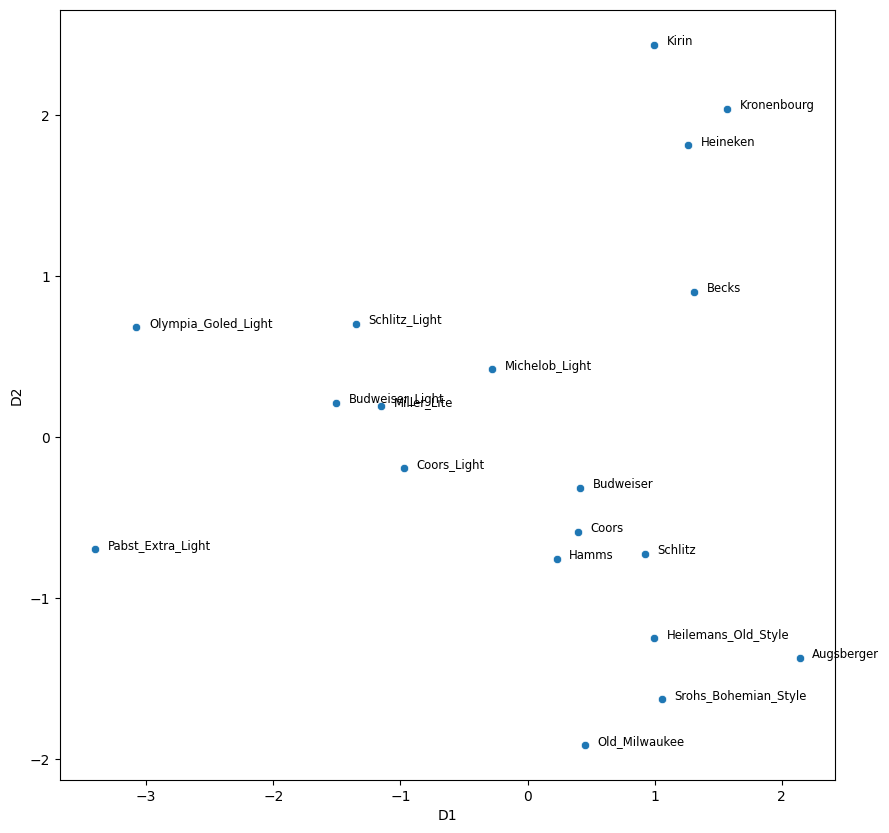

In [126]:
plt.figure(figsize=(10, 10))
sn.scatterplot(data = beer_2d_df,
               x = 'D1',
               y = 'D2');

beer_df

# add annotations one by one with a loop
for line in range( 0, beer_df.shape[0] ):
     plt.text(beer_2d_df.D1[line]+0.1,
              beer_2d_df.D2[line],
              beer_df.name[line],
              horizontalalignment='left',
              size='small',
              color='black')

plt.show()

## Understanding the Component Loadings

In [165]:
# Loadings (Principal Components directions)
loadings = pca.components_

In [166]:
loadings

array([[ 0.65493104,  0.30424411,  0.64243513,  0.25647213],
       [-0.00838917, -0.69111165,  0.04796982,  0.72110554],
       [-0.12676367,  0.63385747, -0.42415044,  0.63423346],
       [ 0.7449335 , -0.16740643, -0.63645298, -0.10943839]])

In [167]:
# Explained variance ratio (percentage of variance explained by each PC)
explained_variance_ratio = pca.explained_variance_ratio_

In [168]:
explained_variance_ratio

array([0.557574  , 0.35850867, 0.06635519, 0.01756214])

In [157]:
# Step 1: Reshape the explained variance ratio for proper broadcasting
explained_variance_ratio_reshaped = explained_variance_ratio.reshape(-1, 1)

# Step 2: Calculate the weighted loadings (abs(loadings) * explained variance ratio)
weighted_loadings = np.abs(loadings) * explained_variance_ratio_reshaped.T

In [158]:
weighted_loadings

array([[0.36517252, 0.10907415, 0.0426289 , 0.0045042 ],
       [0.00467758, 0.24776952, 0.00318305, 0.01266415],
       [0.07068013, 0.2272434 , 0.02814458, 0.01113849],
       [0.41535556, 0.06001666, 0.04223196, 0.00192197]])

In [159]:
# Step 2: Normalize the weighted loadings so that they sum to 1 for each principal component
proportion_effect = weighted_loadings / weighted_loadings.sum(axis=0)

In [160]:
proportion_effect

array([[0.42666034, 0.16934252, 0.36689438, 0.14900346],
       [0.00546519, 0.38467332, 0.02739554, 0.41894306],
       [0.08258126, 0.3528056 , 0.2422321 , 0.3684727 ],
       [0.4852932 , 0.09317856, 0.36347798, 0.06358078]])

In [161]:
np.sum(proportion_effect, axis = 0)

array([1., 1., 1., 1.])

In [162]:

# Create a DataFrame to display the results
proportion_df = pd.DataFrame(proportion_effect, columns=[f"PC{i+1}" for i in range(proportion_effect.shape[1])], index=features)

print("Proportion of Effect of Each Feature on Each Principal Component:")
print(proportion_df)

Proportion of Effect of Each Feature on Each Principal Component:
               PC1       PC2       PC3       PC4
calories  0.426660  0.169343  0.366894  0.149003
sodium    0.005465  0.384673  0.027396  0.418943
alcohol   0.082581  0.352806  0.242232  0.368473
cost      0.485293  0.093179  0.363478  0.063581


In [163]:
# Check if the proportions sum to 1
print("\nProportions Sum to 1 for Each Principal Component:")
print(proportion_df.sum(axis=0))  # Should output 1 for each principal component


Proportions Sum to 1 for Each Principal Component:
PC1    1.0
PC2    1.0
PC3    1.0
PC4    1.0
dtype: float64
